# Task 1

## Import Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import time
import pickle 
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/ryanl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ryanl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Data

In [22]:
def load_collection(file_path):
    with open(file_path) as f:
        # remove the white space at the start and end of each line
        passage_collection = [x.strip() for x in f.readlines()]
    return passage_collection

In [106]:
file_path = 'passage-collection.txt'
passage_collection = load_collection(file_path)     # load the collection

In [107]:
print(len(passage_collection))       # number of passages in the collection

182469


In [108]:
print(passage_collection[0])         # a sample passage

This is the definition of RNA along with examples of types of RNA molecules. This is the definition of RNA along with examples of types of RNA molecules. RNA Definition


## Text Preprocessing

The following **preprocessing steps** were also carried out:

1. **`normalization`**: lowercase, remove numbers, punctuations and non-English words

2. **`tokenization`**: use the RegexpTokenizer to tokenize each passage

3. **`remove stopwords`**: upon request

4. **`lemmatization`**: upon request

In [109]:
def process_passage(passage_collection, remove_sw=False, lemma=False):
    
    if remove_sw:
        stop_words = stopwords.words('english')
    
    if lemma:
        lemmatizer = WordNetLemmatizer()
        
    tokenizer = RegexpTokenizer(r'\s+', gaps=True)
    
    cleaned_passages = []
    
    for passage in passage_collection:
        
        # tokenization, lowercase, remove non-alphabetic tokens (numbers, punctuations, etc.)
        tokens = [token.lower() for token in tokenizer.tokenize(passage) if token.isalpha()]
        
        # remove stopwords if required
        if remove_sw:
            tokens = [token for token in tokens if token not in stop_words]    
        
        passage_cleaned = []
        # lemmatization if required
        if lemma:
            for token in tokens:
                passage_cleaned.append(lemmatizer.lemmatize(token))
        else:
            passage_cleaned = tokens
            
        cleaned_passages.append(passage_cleaned)
        
    return cleaned_passages

In [110]:
cleaned_passages = process_passage(passage_collection, remove_sw=False, lemma=False)

In [111]:
len(cleaned_passages)

182469

## Build Frequency Dictionary

In [112]:
def get_freq_dict(cleaned_passages, order=True):
    
    flatten_passages = [word for passage in cleaned_passages for word in passage]
    
    freq_dict = dict(Counter(flatten_passages))
    freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=order))
    
    return freq_dict

In [113]:
freq_dict = get_freq_dict(cleaned_passages, order=True)

In [114]:
len(freq_dict)

88291

In [115]:
freq = [item[1] for item in freq_dict.items()]
n_words = np.sum(freq)
n_words

8552544

In [116]:
i = 0
for item in freq_dict.items():
    print(item)
    i += 1
    if i > 10:
        break

('the', 618684)
('of', 332028)
('a', 275488)
('and', 250988)
('to', 237481)
('is', 210086)
('in', 196670)
('for', 105884)
('or', 82464)
('that', 77670)
('you', 76352)


## Normalised Frequency vs Frequency Ranking

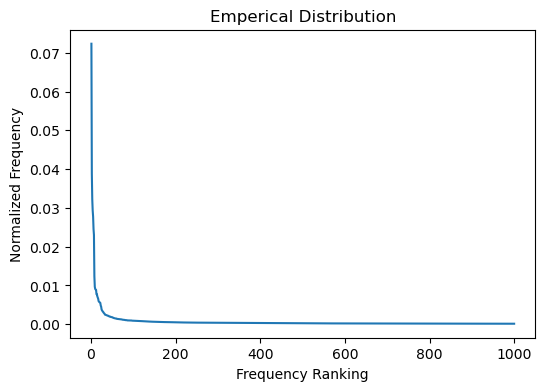

In [155]:
rank = np.arange(1, len(freq_dict)+1)
norm_freq = [freq/n_words for word,freq in freq_dict.items()]

plt.figure(figsize=(6,4))
plt.plot(rank[:1000], norm_freq[:1000])
plt.title('Emperical Distribution')
plt.xlabel('Frequency Ranking')
plt.ylabel('Normalized Frequency')
plt.show()

In [156]:
s = 1
I = [1/(i**(s)) for i in range(1, len(freq_dict)+1)]
total_I = np.sum(I)
F = [(1/(k**(s)))/total_I for k in rank]

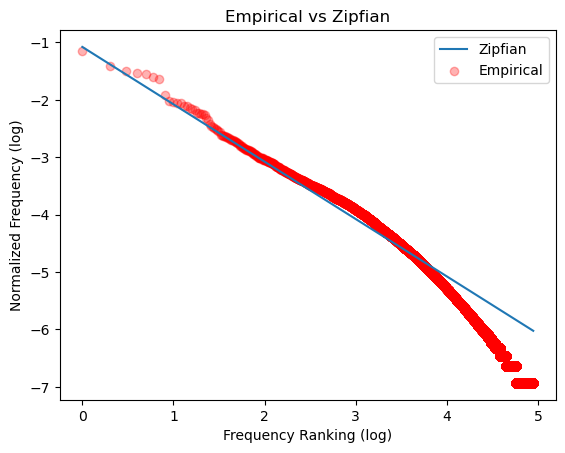

In [159]:
plt.plot(np.log10(rank), np.log10(F), label='Zipfian')
plt.scatter(np.log10(rank), np.log10(norm_freq), color='r', alpha=0.3, label='Empirical')
plt.title('Empirical vs Zipfian')
plt.xlabel('Frequency Ranking (log)')
plt.ylabel('Normalized Frequency (log)')
plt.legend()
plt.show()

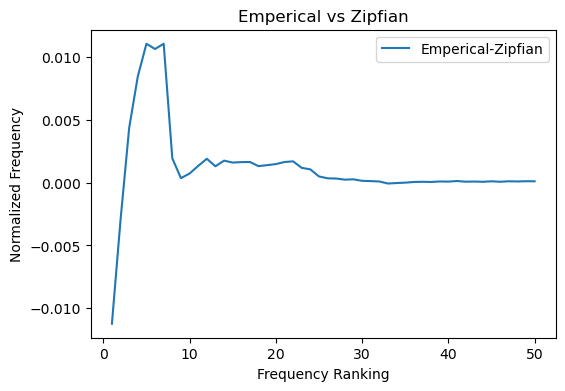

In [154]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,51), (np.array(norm_freq)-np.array(F))[:50], label='Emperical-Zipfian')
plt.legend()
plt.title('Emperical vs Zipfian')
plt.xlabel('Frequency Ranking')
plt.ylabel('Normalized Frequency')
plt.show()

## Removing Stop Words

In [160]:
cleaned_passages = process_passage(passage_collection, remove_sw=True, lemma=False)

In [161]:
len(cleaned_passages)

182469

In [162]:
freq_dict = get_freq_dict(cleaned_passages, order=True)
freq = [item[1] for item in freq_dict.items()]
n_words = np.sum(freq)

In [166]:
rank = np.arange(1, len(freq_dict)+1)
norm_freq = [freq/n_words for word,freq in freq_dict.items()]

In [167]:
s = 1
I = [1/(i**(s)) for i in range(1, len(freq_dict)+1)]
total_I = np.sum(I)
F = [(1/(k**(s)))/total_I for k in rank]

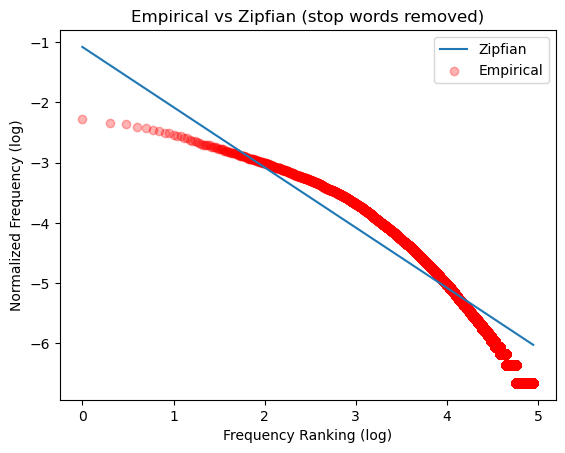

In [168]:
plt.plot(np.log10(rank), np.log10(F), label='Zipfian')
plt.scatter(np.log10(rank), np.log10(norm_freq), color='r', alpha=0.3, label='Empirical')
plt.title('Empirical vs Zipfian (stop words removed)')
plt.xlabel('Frequency Ranking (log)')
plt.ylabel('Normalized Frequency (log)')
plt.legend()
plt.show()

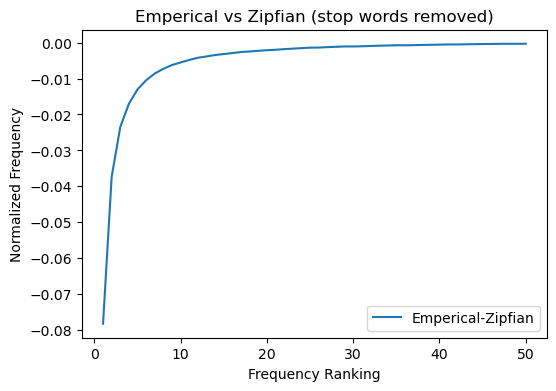

In [174]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,51), (np.array(norm_freq)-np.array(F))[:50], label='Emperical-Zipfian')
plt.legend()
plt.title('Emperical vs Zipfian (stop words removed)')
plt.xlabel('Frequency Ranking')
plt.ylabel('Normalized Frequency')
plt.show()